### *Importing Libraries*

This cell imports essential libraries for data loading, model training, evaluation, and visualization. It includes pandas for data manipulation, scikit-learn for machine learning models and metrics, and matplotlib for plotting.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

### *Loading and Preparing Data*

This cell loads the preprocessed Iris dataset from a CSV file. It separates the features (`X`) from the target labels (`y`) to prepare for model training and evaluation.

In [ ]:
df = pd.read_csv("preprocessed_iris.csv")

X = df.drop("species", axis=1)
y = df["species"]

### *Train/Test Splitting*

This cell splits the dataset into training and test sets using stratified sampling to preserve class balance. 80% of the data is used for training and 20% for testing.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### *Training Decision Tree Classifier and Evaluating it*

This cell trains a Decision Tree classifier on the training data and predicts labels for the test set. It computes performance metrics (accuracy, precision, recall, F1-score) and prints a detailed classification report.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average="macro")
dt_recall = recall_score(y_test, y_pred_dt, average="macro")
dt_f1 = f1_score(y_test, y_pred_dt, average="macro")

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### *Visualizing Decision Tree*

This cell visualizes the trained Decision Tree model, showing how the classifier splits the feature space to make predictions. The plot is saved for documentation.

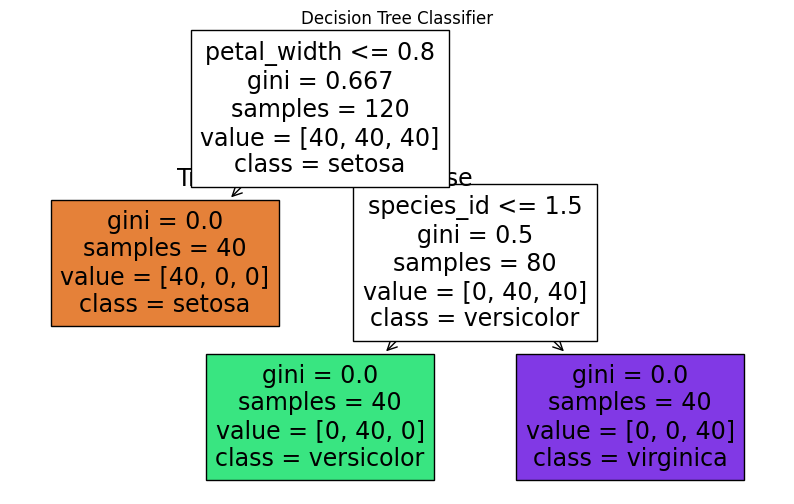

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree Classifier")
plt.savefig("figures/decision_tree.png", dpi=300, bbox_inches='tight') 
plt.show()

### *Training KNN Classifier*

This cell trains a K-Nearest Neighbors (KNN) classifier with 5 neighbors on the training data and predicts labels for the test set.

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


### *Evaluating KNN Classifier*

This cell computes performance metrics for the KNN classifier (accuracy, precision, recall, F1-score) and prints a detailed classification report.

In [8]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average="macro")
knn_recall = recall_score(y_test, y_pred_knn, average="macro")
knn_f1 = f1_score(y_test, y_pred_knn, average="macro")

print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

KNN Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### *Model Comparison*

This cell prints a side-by-side comparison of the performance metrics for both the Decision Tree and KNN classifiers. It also indicates which model performed better based on accuracy.

In [9]:
print("\nModel Comparison:")
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1: {dt_f1:.4f}")
print(f"KNN           - Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1: {knn_f1:.4f}")

if dt_accuracy > knn_accuracy:
    print("\nDecision Tree performed better based on accuracy.")
elif dt_accuracy < knn_accuracy:
    print("\nKNN performed better based on accuracy.")
else:
    print("\nBoth models performed equally well.")


Model Comparison:
Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
KNN           - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Both models performed equally well.


### *Result explanation*
The output above indicates that the dataset was perfectly separable in the selected feature space, allowing both models to classify all instances correctly. In this case, model choice would depend more on interpretability, computational cost, or deployment considerations rather than predictive performance. The Decision Tree offers easy visualization and explainability, while KNN is simple to implement but can be slower for large datasets.

### *Plotting Confusion Matrices*

This cell computes and visualizes the confusion matrices for both classifiers side by side using heatmaps. The plots are saved for documentation and provide a clear view of model performance.

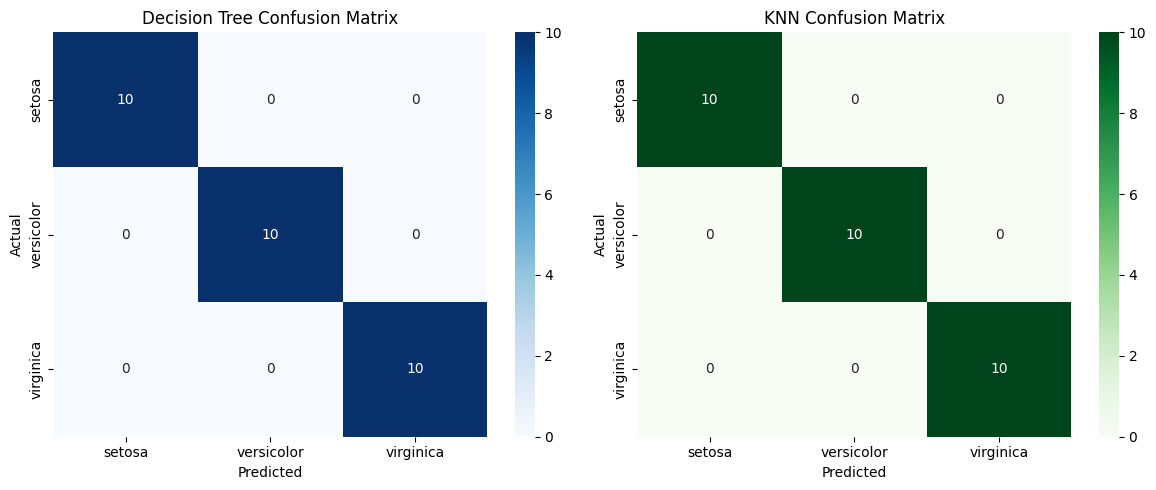

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_, ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_, ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("figures/confusion_matrices.png", dpi=300, bbox_inches='tight')  # Save image
plt.show()


### *Confusion matrix explanation*
The confusion matrices for both the Decision Tree and KNN classifiers show perfect classification, with all instances lying on the diagonal and zero values in off-diagonal cells. This indicates that both models correctly predicted the true class for every test instance, without any false positives or false negatives. In this dataset, the absence of misclassifications means that accuracy, precision, recall, and F1-score are all 1.0, confirming that the models performed equally well.

### *Association Rule Mining part*

### *Importing Libraries for Association Rule Mining*

This cell imports the necessary libraries for association rule mining. It uses `random` for generating synthetic data, `pandas` for data manipulation, and `mlxtend.frequent_patterns` for applying the Apriori algorithm and extracting association rules.

In [17]:
import random
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

### *Generating Synthetic Transaction Data*

This cell creates a synthetic dataset of 40 shopping baskets, each containing a random selection of grocery items. It injects common co-occurrence patterns (like 'milk' and 'bread' together) to simulate realistic market basket data. The first five transactions are printed for inspection.

In [ ]:
items_pool = [
    'milk', 'bread', 'butter', 'cheese', 'yogurt', 'apples', 'bananas', 'oranges',
    'grapes', 'lettuce', 'tomatoes', 'onions', 'carrots', 'potatoes', 'chicken',
    'beef', 'fish', 'eggs', 'rice', 'pasta'
]

random.seed(42) 

transactions = []
for _ in range(40):  
    basket_size = random.randint(3, 8)
    basket = random.sample(items_pool, basket_size)

    # Injecting common co-occurrence patterns
    if random.random() < 0.3:  # 30% chance to add 'milk' + 'bread'
        basket.extend(['milk', 'bread'])
    if random.random() < 0.2:  # 20% chance to add 'eggs' + 'bacon'
        basket.extend(['eggs', 'bacon']) if 'bacon' in items_pool else basket.append('eggs')

    # Removing duplicates
    basket = list(set(basket))
    transactions.append(basket)

# Displaying first 5 transactions
for i, t in enumerate(transactions[:5], start=1):
    print(f"Transaction {i}: {t}")



Transaction 1: ['bread', 'grapes', 'cheese', 'butter', 'onions', 'fish', 'milk', 'oranges']
Transaction 2: ['bread', 'milk', 'potatoes', 'rice']
Transaction 3: ['bananas', 'eggs', 'potatoes', 'cheese', 'pasta', 'milk', 'oranges']
Transaction 4: ['apples', 'tomatoes', 'bread', 'potatoes', 'milk']
Transaction 5: ['cheese', 'butter', 'pasta', 'onions', 'carrots']


### *Converting Transactions to One-Hot Encoded DataFrame*

This cell transforms the list of transactions into a one-hot encoded DataFrame, where each column represents an item and each row indicates whether the item was present in the transaction. This format is required for the Apriori algorithm.

In [ ]:
all_items = sorted(set(item for basket in transactions for item in basket))
df = pd.DataFrame([{item: (item in basket) for item in all_items} for basket in transactions])


### *Applying Apriori Algorithm*

This cell applies the Apriori algorithm to the one-hot encoded data to find frequent itemsets with a minimum support of 0.2. It then generates association rules with a minimum confidence threshold of 0.5.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


### *Sorting and Displaying Top Association Rules*

This cell sorts the generated association rules by lift and displays the top five rules. These rules highlight the strongest associations between items in the synthetic basket data.

In [ ]:
top_rules = rules.sort_values(by="lift", ascending=False).head(5)
print("\nTop 5 Rules by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Rules by Lift:
  antecedents consequents  support  confidence      lift
1     (bread)      (milk)    0.350    0.736842  1.637427
2      (milk)     (bread)    0.350    0.777778  1.637427
3  (tomatoes)     (bread)    0.200    0.727273  1.531100
0    (butter)     (bread)    0.225    0.692308  1.457490
7      (eggs)    (grapes)    0.200    0.500000  1.333333


### *Saving Synthetic Basket Data*

This cell saves the one-hot encoded synthetic transaction data to a CSV file named `synthetic_basket_data.csv`.

In [ ]:
df.to_csv("synthetic_basket_data.csv", index=False)